In [1]:
import pathlib
import pickle
import pandas as pd
import seaborn as sns
import regression as reg
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

**nota: usar região como recorte**

## Leitura dos Dados Pré-Processados

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'projeto' / 'data'
print(DATA_DIR)

/home/jupyter/notebooks/projeto/data


In [3]:
PROCESSED_FILE_PATH = DATA_DIR / 'processed' / 'candidatos_centrais.pkl'

In [4]:
with open(PROCESSED_FILE_PATH, 'rb') as file:
    (
        df
    ) = pickle.load(file)

In [5]:
print(df.shape)
df.head(5)

(1500, 35)


,index,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,Q001,Q002,Q005,Q006,Q007,Q008,...,RESPOSTAS_QUESTIONARIO,ACERTOS_TOTAIS,RESPOSTAS_ESPECIFICAS,RESPOSTAS_GERAIS,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,c_quest,c_quest_restrict,c_prova,c_prova_restrict
0,2146868,210054238796,11,M,E,C,2.0,C,A,B,...,BECCABCAABAAAAABCB,60,AAACBCBDBAABEDBCECEBBACBDCABCBABDEBCADBBCCAEEA...,DCBECBBAAEBBCADEBDCABDCDBABCDDDAEBAEDDAEBEAAAB...,32,28,0.859167,0.801667,0.176458,0.822500
1,2822966,210052121926,3,F,B,B,8.0,D,A,D,...,EBBDADEAACCBBAACEC,51,ADDBEABACABBAEDBDCABEAEDCCCDDBEEAEDBDCEEEBBCAC...,DEEACCDDAEEBEAEADCCDCDBDBABCECDABCDEDCBACEAEAB...,30,21,0.165417,0.244162,0.248125,0.813333
2,2965833,210054081240,6,F,G,F,4.0,H,A,C,...,DGFHACDABBBBBBABED,93,DAABCACEBEBBEECAEBEBBAEBAAABDEBDBECDACABEEAECC...,EEDBCAADADDBEABDAEBDADABDABCDCACABDAEAAABCABAB...,44,49,0.807500,0.976667,0.205417,0.906667
3,2322664,210051351311,10,M,D,F,5.0,G,A,B,...,EDFGABDBCBABABAAEB,55,BCACEACEADCBADCBBDCAEBDABEDBDBACBECCBAABEABEAB...,DEEACCEBEAACBEDBEADADDCBDEACCEDBDDDAEBBADDBAEE...,20,35,0.203958,0.180150,0.223333,0.157631
4,2660396,210054361898,17,F,A,B,2.0,B,A,B,...,BABBABCAABAAAAABCA,55,DDEAAAECCDBCECDDDEEBBCEABDADAEEDBBECDDABEAAADD...,ECBADDABAABAEBDCDDAABAEDCECADBBABCEEDBCABCAAAB...,26,29,0.213750,0.236239,0.174792,0.231651


## Verificando Perfil dos Candidatos Centrais

Vamos dar uma olhada na divisão das centralidades calculadas para cada rede:

<AxesSubplot: >

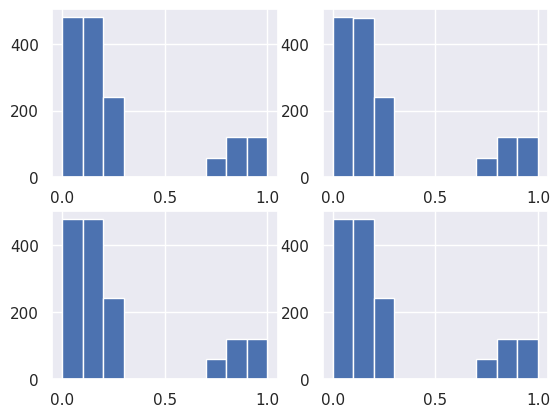

In [6]:
plt.figure()
plt.subplot(2, 2, 1)
df['c_quest'].hist()
plt.subplot(2, 2, 2)
df['c_quest_restrict'].hist()
plt.subplot(2, 2, 3)
df['c_prova'].hist()
plt.subplot(2, 2, 4)
df['c_prova_restrict'].hist()

Parece haver uma distinção clara entre centro e periferia a partir de $c = 0.5$. Vou utilizar esse valor como thresh para criar novos dataframes.

In [9]:
centrais_prova_mean = df.loc[df['c_prova'] > 0.5]

In [14]:
centrais_prova_restrict = df.loc[df['c_prova_restrict'] > 0.5]

In [15]:
centrais_quest_mean = df.loc[df['c_quest'] > 0.5]

In [20]:
centrais_quest_restrict = df.loc[df['c_quest_restrict'] > 0.5]

### Para os centrais na Rede da Prova

In [23]:
colunas_de_interesse = ['TP_FAIXA_ETARIA','TP_SEXO', 'ACERTOS_GERAIS', 'ACERTOS_ESPECIFICAS', 
                        'ACERTOS_TOTAIS', 'c_quest', 'c_prova', 'c_quest_restrict', 'c_prova_restrict']

In [28]:
summary_prova = centrais_prova_mean[colunas_de_interesse].describe()
summary_prova

,TP_FAIXA_ETARIA,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.391304,27.943144,31.237458,59.180602,0.320401,0.875000,0.355362,0.362229
std,3.539431,10.662302,12.373947,21.934638,0.309640,0.072048,0.336046,0.343653
min,1.000000,7.000000,5.000000,18.000000,0.002500,0.750833,0.003962,0.005004
25%,2.000000,20.000000,23.000000,44.000000,0.124896,0.812917,0.118745,0.117077
50%,3.000000,26.000000,28.000000,54.000000,0.197917,0.875000,0.193286,0.194954
75%,5.000000,34.000000,35.500000,69.500000,0.245938,0.937083,0.788750,0.786250
max,17.000000,59.000000,82.000000,138.000000,0.995833,0.999167,0.997500,0.996667


In [29]:
summary_prova_restrict = centrais_prova_restrict[colunas_de_interesse].describe()
summary_prova_restrict

,TP_FAIXA_ETARIA,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.678930,28.344482,30.705686,59.050167,0.404222,0.372707,0.849816,0.875000
std,3.711571,10.427364,11.810884,21.114759,0.332390,0.324731,0.150872,0.072048
min,1.000000,7.000000,12.000000,25.000000,0.038333,0.012708,0.180359,0.750833
25%,2.000000,20.000000,22.500000,43.000000,0.166146,0.155313,0.808750,0.812917
50%,3.000000,27.000000,27.000000,55.000000,0.217292,0.206667,0.874167,0.875000
75%,6.000000,34.000000,35.000000,70.000000,0.797917,0.785417,0.937083,0.937083
max,17.000000,63.000000,83.000000,143.000000,0.998333,0.999167,0.999167,0.999167


### Para os centrais na Rede de Questionário

In [30]:
summary_quest = centrais_quest_mean[colunas_de_interesse].describe()
summary_quest

,TP_FAIXA_ETARIA,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.434783,28.87291,31.602007,60.474916,0.875000,0.329681,0.397557,0.393607
std,3.483171,10.92119,12.909811,22.800018,0.072048,0.301931,0.342647,0.339397
min,1.000000,9.00000,5.000000,18.000000,0.750833,0.011250,0.003962,0.008340
25%,2.000000,21.00000,23.000000,44.000000,0.812917,0.153854,0.155442,0.154817
50%,3.000000,27.00000,28.000000,55.000000,0.875000,0.200208,0.217264,0.217056
75%,5.000000,35.00000,37.000000,72.000000,0.937083,0.242917,0.807917,0.815833
max,16.000000,63.00000,86.000000,146.000000,0.999167,0.999167,0.999167,0.997500


In [32]:
summary_quest_restrict = centrais_quest_restrict[colunas_de_interesse].describe()
summary_quest_restrict

,TP_FAIXA_ETARIA,ACERTOS_GERAIS,ACERTOS_ESPECIFICAS,ACERTOS_TOTAIS,c_quest,c_prova,c_quest_restrict,c_prova_restrict
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.638796,28.498328,31.143813,59.642140,0.407591,0.370684,0.875000,0.848542
std,3.603219,10.709519,12.197317,21.825475,0.333671,0.323805,0.072048,0.150495
min,1.000000,7.000000,12.000000,25.000000,0.038333,0.012708,0.750833,0.172018
25%,2.000000,20.000000,23.000000,43.000000,0.167604,0.155313,0.812917,0.807083
50%,3.000000,27.000000,28.000000,55.000000,0.217292,0.206667,0.875000,0.872500
75%,6.000000,34.500000,36.000000,70.500000,0.802500,0.783333,0.937083,0.936250
max,17.000000,63.000000,83.000000,143.000000,0.998333,0.999167,0.999167,0.999167


Opa! Parece que para um threshold de acertos mais alto a centralidade de questionário e de prova estão correlacionados positivamente!

## Analisando Respostas do Questionário

In [38]:
questoes_socio = ['Q001', 'Q002', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
                  'Q013','Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024', 'Q005_str']

In [43]:
enunciado_questoes = ['Até que série seu pai, ou o homem responsável por você, estudou?',
                     'Até que série sua mãe, ou a mulher responsável por você, estudou?',
                     'Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.',
                     'Em sua residência trabalha empregado(a) doméstico(a)?',
                     'Na sua residência tem banheiro?',
                     'Na sua residência tem quartos para dormir?',
                     'Na sua residência tem carro?',
                     'Na sua residência tem motocicleta?',
                     'Na sua residência tem geladeira?',
                     'Na sua residência tem freezer (independente ou segunda porta da geladeira)?',
                     'Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)',
                     'Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?',
                     'Na sua residência tem forno micro-ondas?',
                     'Na sua residência tem máquina de lavar louça?',
                     'Na sua residência tem televisão em cores?',
                     'Na sua residência tem telefone celular?',
                     'Na sua residência tem computador?',
                     'Incluindo você, quantas pessoas moram atualmente em sua residência?']

In [44]:
centro_quest = df.loc[df['c_quest_restrict'] > 0.5]
periferia_quest = df.loc[df['c_quest_restrict'] < 0.5]

In [63]:
value_counts_q = centro_quest['Q001'].value_counts().sort_index()
value_counts_q/value_counts_q.sum()

A    0.020067
B    0.130435
C    0.147157
D    0.100334
E    0.344482
F    0.076923
G    0.113712
H     0.06689
Name: Q001, dtype: Float64

Esquerda: Centro / Direita: Periferia
Q001 : Até que série seu pai, ou o homem responsável por você, estudou?


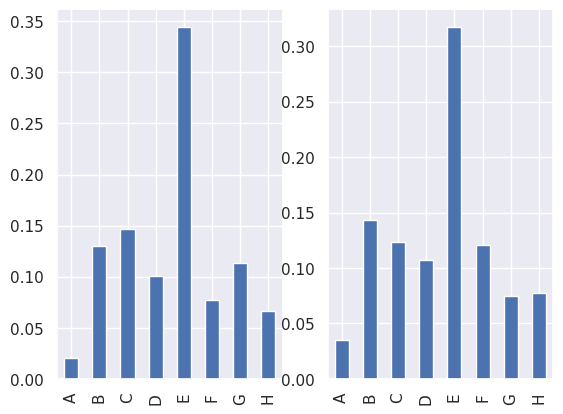

Esquerda: Centro / Direita: Periferia
Q002 : Até que série sua mãe, ou a mulher responsável por você, estudou?


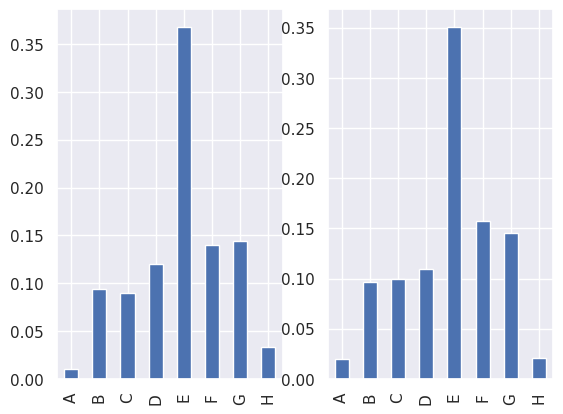

Esquerda: Centro / Direita: Periferia
Q006 : Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.


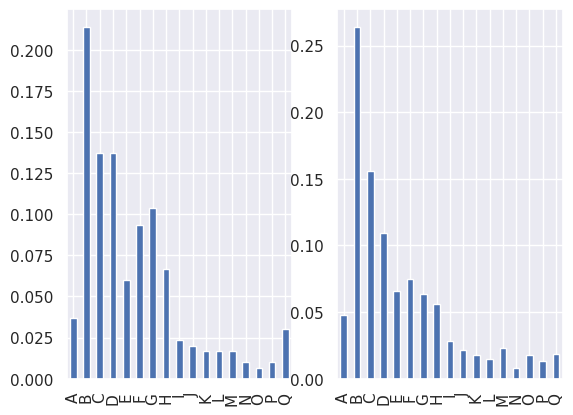

Esquerda: Centro / Direita: Periferia
Q007 : Em sua residência trabalha empregado(a) doméstico(a)?


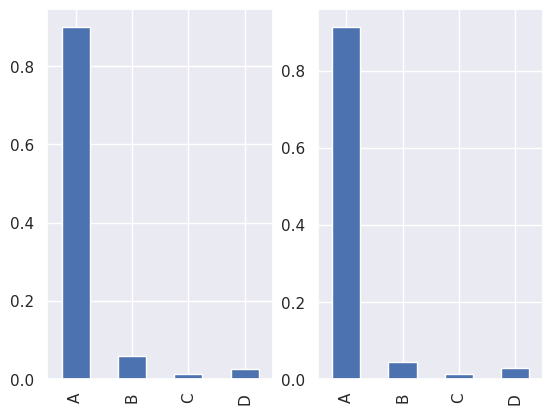

Esquerda: Centro / Direita: Periferia
Q008 : Na sua residência tem banheiro?


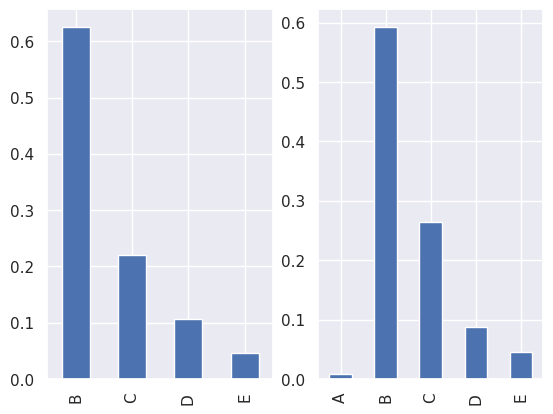

Esquerda: Centro / Direita: Periferia
Q009 : Na sua residência tem quartos para dormir?


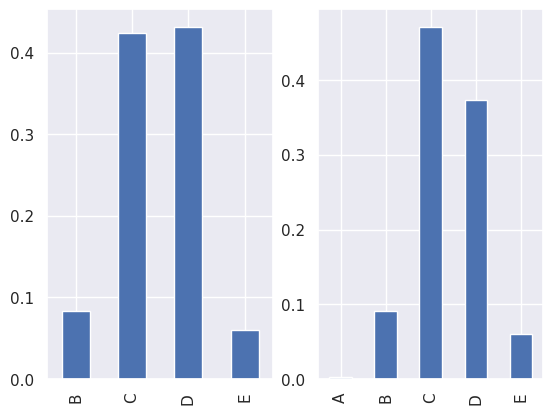

Esquerda: Centro / Direita: Periferia
Q010 : Na sua residência tem carro?


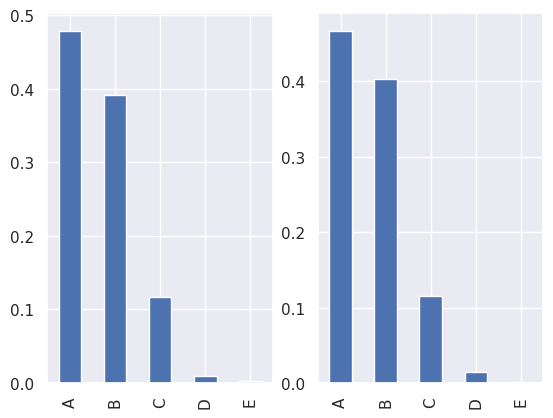

Esquerda: Centro / Direita: Periferia
Q011 : Na sua residência tem motocicleta?


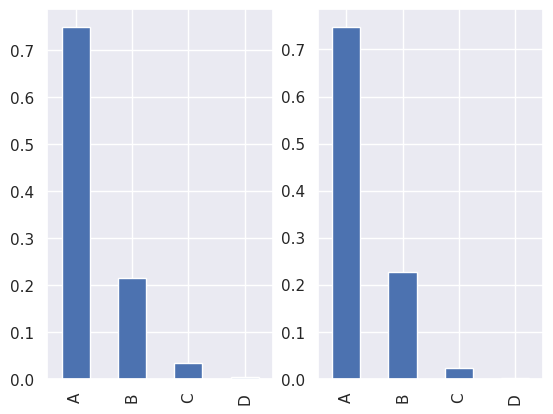

Esquerda: Centro / Direita: Periferia
Q012 : Na sua residência tem geladeira?


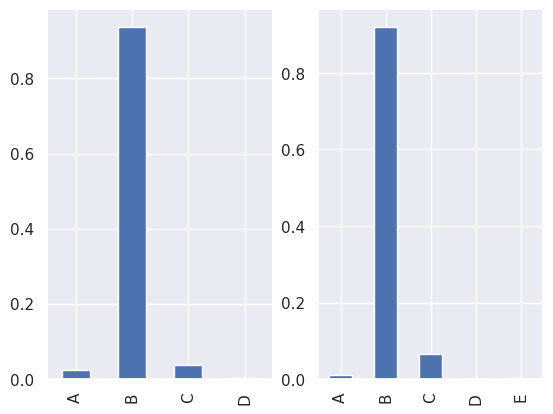

Esquerda: Centro / Direita: Periferia
Q013 : Na sua residência tem freezer (independente ou segunda porta da geladeira)?


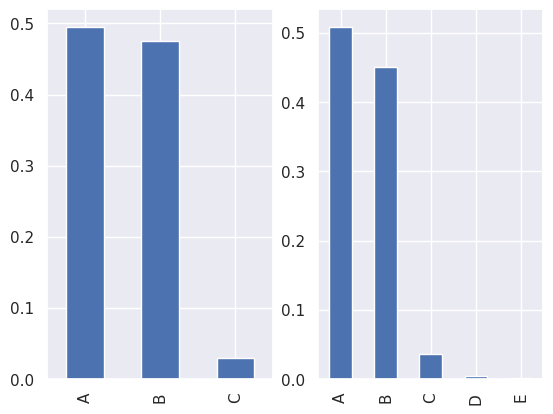

Esquerda: Centro / Direita: Periferia
Q014 : Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)


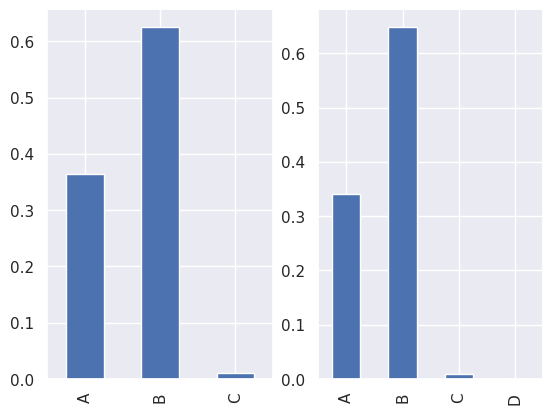

Esquerda: Centro / Direita: Periferia
Q015 : Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?


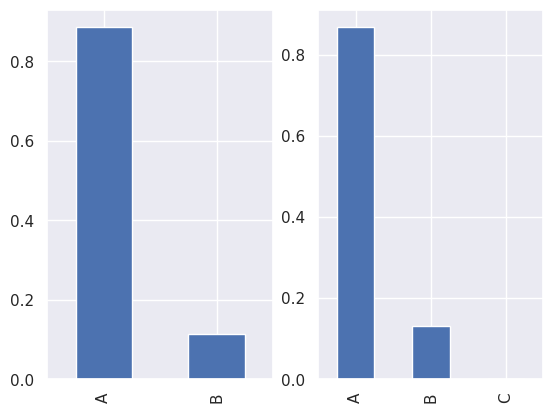

Esquerda: Centro / Direita: Periferia
Q016 : Na sua residência tem forno micro-ondas?


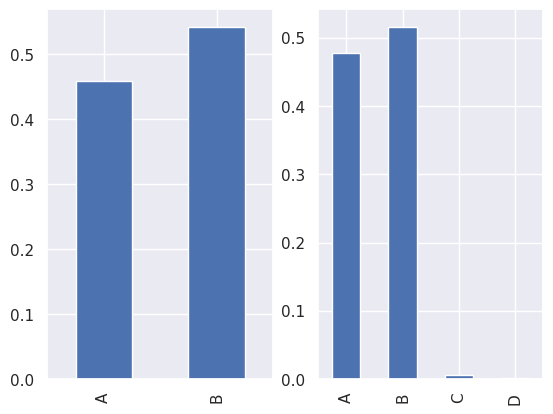

Esquerda: Centro / Direita: Periferia
Q017 : Na sua residência tem máquina de lavar louça?


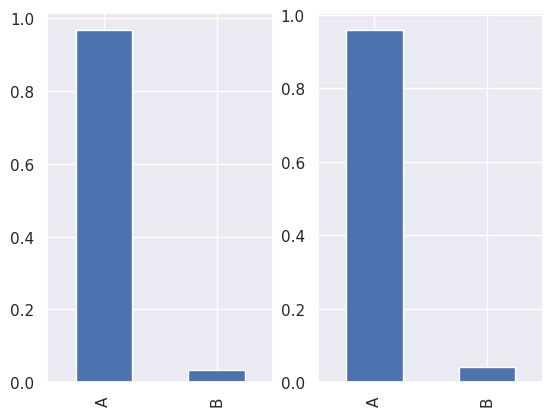

Esquerda: Centro / Direita: Periferia
Q019 : Na sua residência tem televisão em cores?


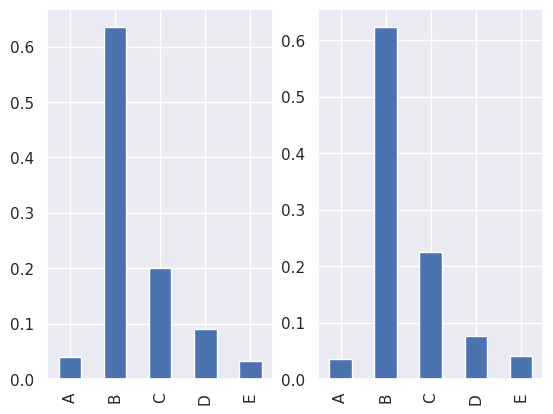

Esquerda: Centro / Direita: Periferia
Q022 : Na sua residência tem telefone celular?


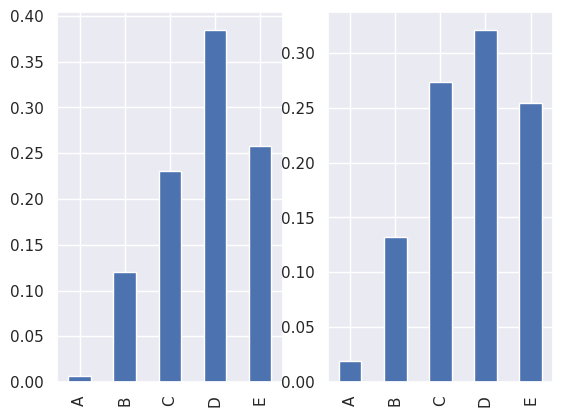

Esquerda: Centro / Direita: Periferia
Q024 : Na sua residência tem computador?


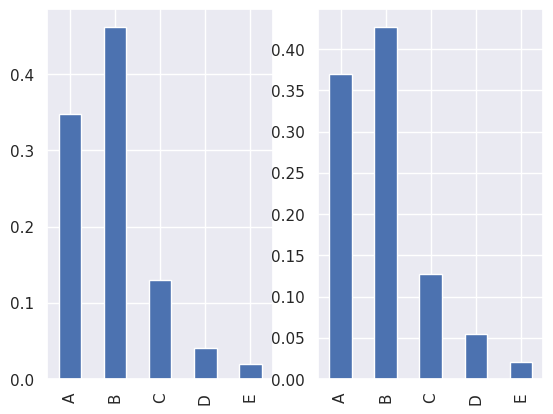

Esquerda: Centro / Direita: Periferia
Q005_str : Incluindo você, quantas pessoas moram atualmente em sua residência?


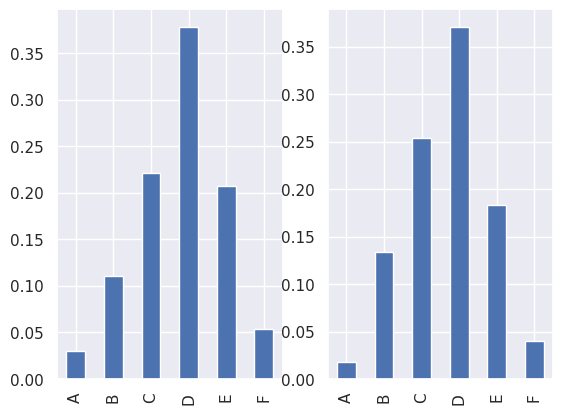

In [67]:
 for i, quest in enumerate(questoes_socio):
    print('Esquerda: Centro / Direita: Periferia')
    plt.figure()
    value_counts_q = centro_quest[quest].value_counts().sort_index()
    norm_vc_q = value_counts_q/value_counts_q.sum()
    value_counts_p = periferia_quest[quest].value_counts().sort_index()
    norm_vc_p = value_counts_p/value_counts_p.sum()
    print(quest, ':', enunciado_questoes[i])
    plt.subplot(1, 2, 1)
    #value_counts_q.plot(kind='bar')
    norm_vc_q.plot(kind='bar')
    plt.subplot(1, 2, 2)
    #value_counts_p.plot(kind='bar')
    norm_vc_p.plot(kind='bar')
    plt.show()

### Aplicando Staircase Encoding

In [68]:
values = list(df['TP_FAIXA_ETARIA'].unique())
values.sort()
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [69]:
length = len(values) - 1

dummies = [[] for i in range(length)]

In [70]:
for value in df['TP_FAIXA_ETARIA']:
    index = values.index(value)

    for i in range(index):
        dummies[i].append(1)

    for i in range(index, length):
        dummies[i].append(0)

In [71]:
for value, dummy in zip(values[1:], dummies):
    df[f'TP_FAIXA_ETARIA{value}'] = dummy

## Aplicando dummies em `TP_SEXO`

In [72]:
df = pd.get_dummies(df, columns=['TP_SEXO'])

In [76]:
df.columns

Index(['index', 'NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'Q001', 'Q002', 'Q005',
       'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 'Q024', 'RESPOSTAS_PROVA',
       'GABARITO_OFICIAL', 'Q005_str', 'RESPOSTAS_QUESTIONARIO',
       'ACERTOS_TOTAIS', 'RESPOSTAS_ESPECIFICAS', 'RESPOSTAS_GERAIS',
       'ACERTOS_GERAIS', 'ACERTOS_ESPECIFICAS', 'c_quest', 'c_quest_restrict',
       'c_prova', 'c_prova_restrict', 'TP_FAIXA_ETARIA2', 'TP_FAIXA_ETARIA3',
       'TP_FAIXA_ETARIA4', 'TP_FAIXA_ETARIA5', 'TP_FAIXA_ETARIA6',
       'TP_FAIXA_ETARIA7', 'TP_FAIXA_ETARIA8', 'TP_FAIXA_ETARIA9',
       'TP_FAIXA_ETARIA10', 'TP_FAIXA_ETARIA11', 'TP_FAIXA_ETARIA12',
       'TP_FAIXA_ETARIA13', 'TP_FAIXA_ETARIA14', 'TP_FAIXA_ETARIA15',
       'TP_FAIXA_ETARIA16', 'TP_FAIXA_ETARIA17', 'TP_SEXO_F', 'TP_SEXO_M'],
      dtype='object')

In [77]:
df_centrais_prova = df.loc[df['c_prova_restrict'] > 0.5]
df_periferia_prova = df.loc[df['c_prova_restrict'] < 0.5]

## Fazendo Regressões

### Verificando efeitos separadamente

#### 1. Centralidade do Questionário

In [78]:
result = reg.linear(data=df, formula='c_prova_restrict ~ c_quest_restrict')
result.micro_summary()

variable,coefficient,std error,p-value
c_quest_restrict,0.957888,0.007421,0.000000


#### 2. Sexo

In [79]:
result = reg.linear(data=df, formula='c_prova_restrict ~ TP_SEXO_F')
result.micro_summary()

variable,coefficient,std error,p-value
TP_SEXO_F,-0.031522,0.016556,0.057113


#### 3. Faixa Etária

In [81]:
result = reg.linear(data=df, formula='c_prova_restrict ~ TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14 + TP_FAIXA_ETARIA15 + TP_FAIXA_ETARIA16 + TP_FAIXA_ETARIA17')
result.micro_summary()

variable,coefficient,std error,p-value
TP_FAIXA_ETARIA2,0.046747,0.029327,0.111148
TP_FAIXA_ETARIA3,-0.004255,0.023183,0.854383
TP_FAIXA_ETARIA4,-0.027332,0.028783,0.342482
TP_FAIXA_ETARIA5,-0.033605,0.038276,0.380104
TP_FAIXA_ETARIA6,0.091683,0.048209,0.057394
TP_FAIXA_ETARIA7,-0.034860,0.063594,0.583665
TP_FAIXA_ETARIA8,0.037184,0.074357,0.617098
TP_FAIXA_ETARIA9,0.083933,0.084921,0.323138
TP_FAIXA_ETARIA10,-0.114037,0.091068,0.210688
TP_FAIXA_ETARIA11,-0.000831,0.074009,0.991042


### Análise Conjunta

In [85]:
result = reg.linear(data = df, formula = 'c_prova_restrict ~ c_quest_restrict + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14 + TP_FAIXA_ETARIA15 + TP_FAIXA_ETARIA16 + TP_FAIXA_ETARIA17')

In [86]:
result.micro_summary()

variable,coefficient,std error,p-value
c_quest_restrict,0.957279,0.007445,0.000000
TP_SEXO_M,0.007459,0.004787,0.119354
TP_FAIXA_ETARIA2,-0.004438,0.008415,0.598036
TP_FAIXA_ETARIA3,-0.002573,0.006643,0.698554
TP_FAIXA_ETARIA4,-0.004800,0.008249,0.560743
TP_FAIXA_ETARIA5,-0.008742,0.010968,0.425576
TP_FAIXA_ETARIA6,0.009230,0.013828,0.504580
TP_FAIXA_ETARIA7,0.009582,0.018243,0.599481
TP_FAIXA_ETARIA8,-0.008316,0.021316,0.696513
TP_FAIXA_ETARIA9,-0.000797,0.024342,0.973892


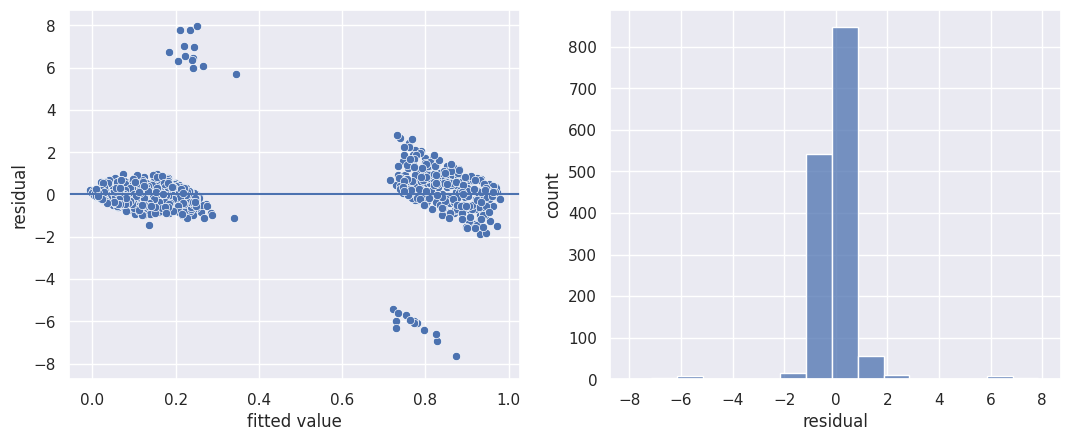

In [87]:
result.plot_residuals()

In [ ]:
df_centrais_prova = df.loc[df['c_prova_restrict'] > 0.5]
df_periferia_prova = df.loc[df['c_prova_restrict'] < 0.5]

In [88]:
result = reg.linear(data = df_centrais_prova, formula = 'c_prova_restrict ~ c_quest_restrict + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14 + TP_FAIXA_ETARIA15 + TP_FAIXA_ETARIA16 + TP_FAIXA_ETARIA17')

In [90]:
result.micro_summary()

variable,coefficient,std error,p-value
c_quest_restrict,0.138526,0.027785,0.000001
TP_SEXO_M,0.002497,0.008420,0.767062
TP_FAIXA_ETARIA2,0.011187,0.015960,0.483914
TP_FAIXA_ETARIA3,-0.001561,0.011493,0.892058
TP_FAIXA_ETARIA4,-0.000031,0.015479,0.998414
TP_FAIXA_ETARIA5,-0.008729,0.023308,0.708315
TP_FAIXA_ETARIA6,0.003709,0.026067,0.886946
TP_FAIXA_ETARIA7,0.018496,0.031530,0.557926
TP_FAIXA_ETARIA8,-0.043947,0.035062,0.211105
TP_FAIXA_ETARIA9,0.047409,0.033940,0.163572


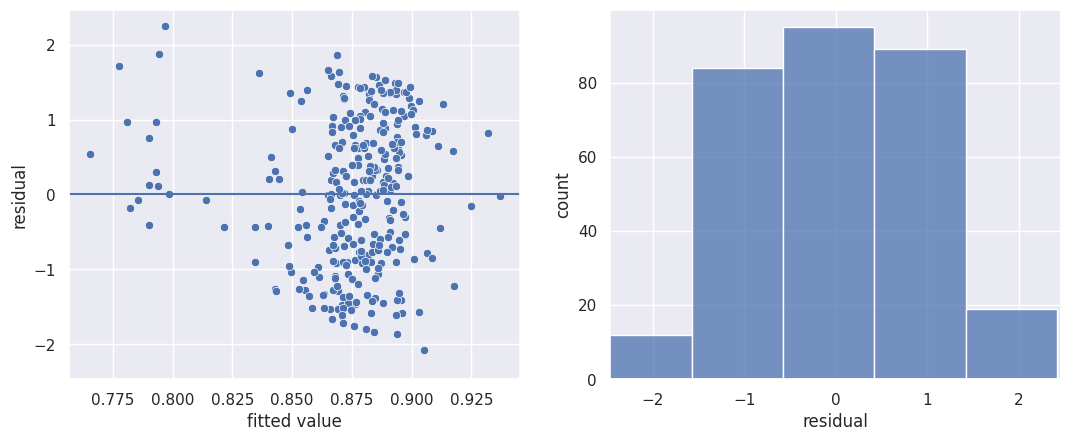

In [89]:
result.plot_residuals()

In [91]:
result = reg.linear(data = df_periferia_prova, formula = 'c_prova_restrict ~ c_quest_restrict + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14 + TP_FAIXA_ETARIA15 + TP_FAIXA_ETARIA16 + TP_FAIXA_ETARIA17')

In [92]:
result.micro_summary()

variable,coefficient,std error,p-value
c_quest_restrict,0.535571,0.013905,0.000000
TP_SEXO_M,0.007845,0.002938,0.007676
TP_FAIXA_ETARIA2,-0.000328,0.005050,0.948262
TP_FAIXA_ETARIA3,-0.004142,0.004067,0.308711
TP_FAIXA_ETARIA4,0.004527,0.004960,0.361640
TP_FAIXA_ETARIA5,-0.005232,0.006446,0.417119
TP_FAIXA_ETARIA6,0.010087,0.008394,0.229714
TP_FAIXA_ETARIA7,-0.001786,0.011191,0.873244
TP_FAIXA_ETARIA8,-0.013025,0.013300,0.327613
TP_FAIXA_ETARIA9,0.004578,0.016200,0.777519


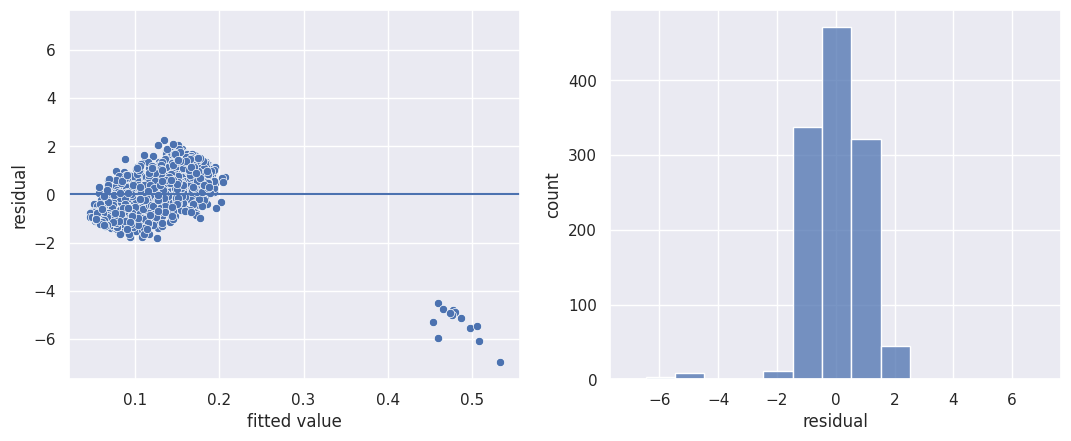

In [93]:
result.plot_residuals()

## Refazendo regressões discretizando centro e periferia

In [96]:
df['CENTRO_QUEST'] = df.apply(lambda row: 1 if row['c_quest_restrict'] > 0.5 else 0, axis = 1)
df['CENTRO_PROVA'] = df.apply(lambda row: 1 if row['c_prova_restrict'] > 0.5 else 0, axis = 1)

In [97]:
df.head(5)

,index,NU_INSCRICAO,TP_FAIXA_ETARIA,Q001,Q002,Q005,Q006,Q007,Q008,Q009,...,TP_FAIXA_ETARIA12,TP_FAIXA_ETARIA13,TP_FAIXA_ETARIA14,TP_FAIXA_ETARIA15,TP_FAIXA_ETARIA16,TP_FAIXA_ETARIA17,TP_SEXO_F,TP_SEXO_M,CENTRO_QUEST,CENTRO_PROVA
0,2146868,210054238796,11,E,C,2.0,C,A,B,C,...,0,0,0,0,0,0,0,1,1,1
1,2822966,210052121926,3,B,B,8.0,D,A,D,E,...,0,0,0,0,0,0,1,0,0,1
2,2965833,210054081240,6,G,F,4.0,H,A,C,D,...,0,0,0,0,0,0,1,0,1,1
3,2322664,210051351311,10,D,F,5.0,G,A,B,D,...,0,0,0,0,0,0,0,1,0,0
4,2660396,210054361898,17,A,B,2.0,B,A,B,C,...,1,1,1,1,1,1,1,0,0,0


In [104]:
df_centro_quest = df.loc[df['CENTRO_QUEST'] == 1]

In [105]:
df_periferia_quest = df.loc[df['CENTRO_QUEST'] == 0]

In [106]:
results = reg.linear(data=df, formula='CENTRO_PROVA ~ CENTRO_QUEST + TP_SEXO_M + TP_FAIXA_ETARIA2 + TP_FAIXA_ETARIA3 + TP_FAIXA_ETARIA4 + TP_FAIXA_ETARIA5 + TP_FAIXA_ETARIA6 + TP_FAIXA_ETARIA7 + TP_FAIXA_ETARIA8 + TP_FAIXA_ETARIA9 + TP_FAIXA_ETARIA10 + TP_FAIXA_ETARIA11 + TP_FAIXA_ETARIA12 + TP_FAIXA_ETARIA13 + TP_FAIXA_ETARIA14')
results.micro_summary()

variable,coefficient,std error,p-value
CENTRO_QUEST,0.945058,0.008442,0.000000
TP_SEXO_M,0.007680,0.007030,0.274760
TP_FAIXA_ETARIA2,-0.009842,0.012370,0.426347
TP_FAIXA_ETARIA3,-0.000456,0.009765,0.962745
TP_FAIXA_ETARIA4,-0.007740,0.012133,0.523581
TP_FAIXA_ETARIA5,-0.014891,0.016131,0.356085
TP_FAIXA_ETARIA6,0.010720,0.020335,0.598152
TP_FAIXA_ETARIA7,0.010298,0.026830,0.701156
TP_FAIXA_ETARIA8,0.005348,0.031354,0.864578
TP_FAIXA_ETARIA9,0.004296,0.035797,0.904480


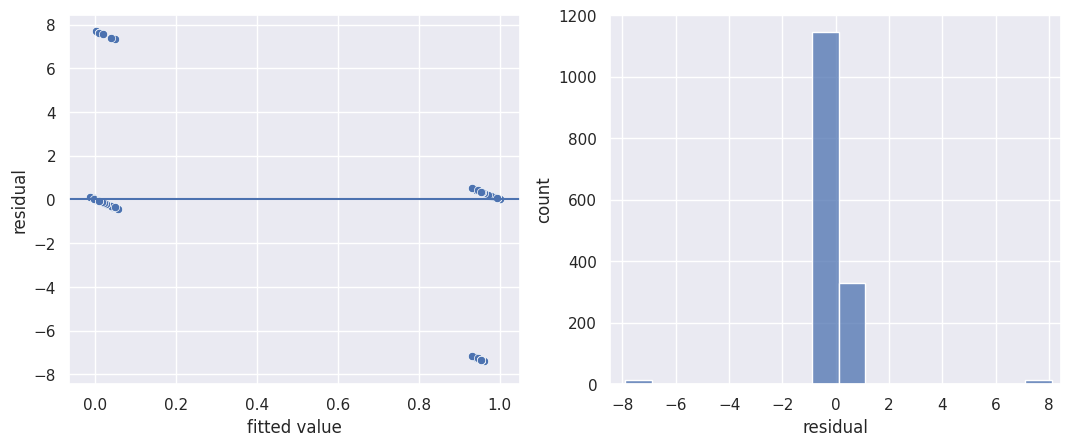

In [101]:
results.plot_residuals()